In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

sns.set_theme()

In [49]:
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/rotated_tasks_exp_[2, 3].csv")

In [50]:
n = 100
df["m"] = df["m"]/n

In [51]:
del df["Unnamed: 0"]

In [52]:
dfm = df.melt(['m', 'r'], var_name='Alpha', value_name='Risk')

(0.0, 50.0)

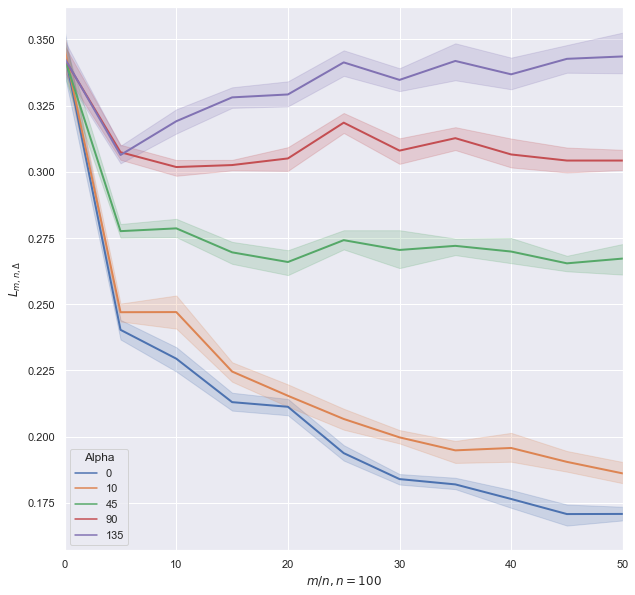

In [37]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Alpha", ax=ax, markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
ax.set_xlim([0, 50])

In [39]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/rotated_BvC.svg", bbox_inches="tight")

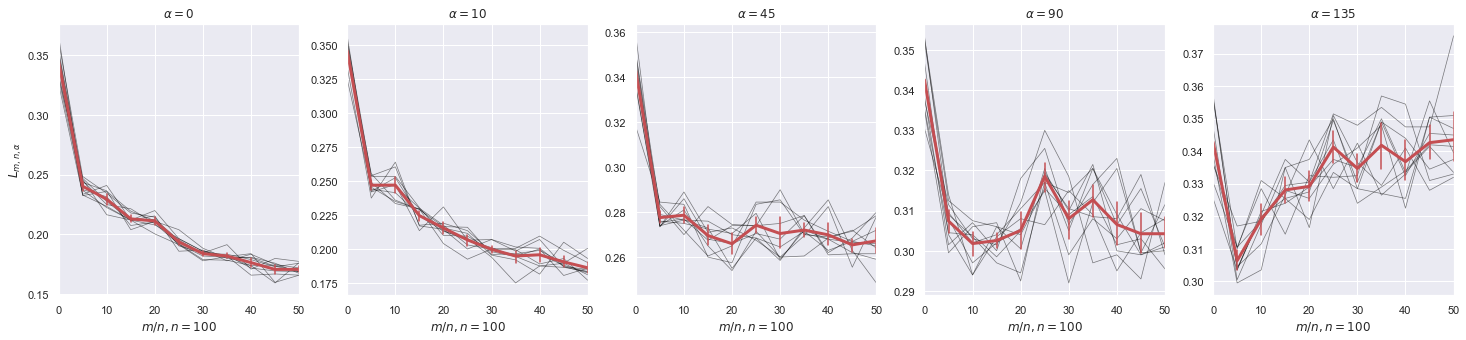

In [55]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5), facecolor='white')
axs = axs.ravel()
Alpha = [0, 10, 45, 90, 135]
for i, alpha in enumerate(Alpha):
    ax = sns.lineplot(data=df, x="m", y=str(alpha), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[i], estimator=None, lw=0.7, alpha=0.5, legend=False)
    ax = sns.lineplot(data=df, x="m", y=str(alpha), ax=ax, markers=True, color='r', err_style="bars", lw=3)
    ax.set_title(r"$\alpha = {}$".format(str(alpha)))
    ax.set_xlabel("")
    ax.set_ylabel("")
    if i == 0:
        ax.set_ylabel(r"$L_{m, n, \alpha}$")
    ax.set_xlabel(r"$m/n, n=100$")
    ax.set_xlim([0, 50])

In [56]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/rotated_BvC_reps.svg", bbox_inches="tight")

---

In [148]:
filename = "cifar10_multihead_dual_tasks_[2, 3]_[6, 7]_sanity_check"

In [149]:
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))

In [150]:
n = 100
df["m"] = df["m"]/n

In [151]:
del df["Unnamed: 0"]

In [152]:
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

Text(0.5, 1.0, 'Bird vs. Cat - Frog vs. Horse')

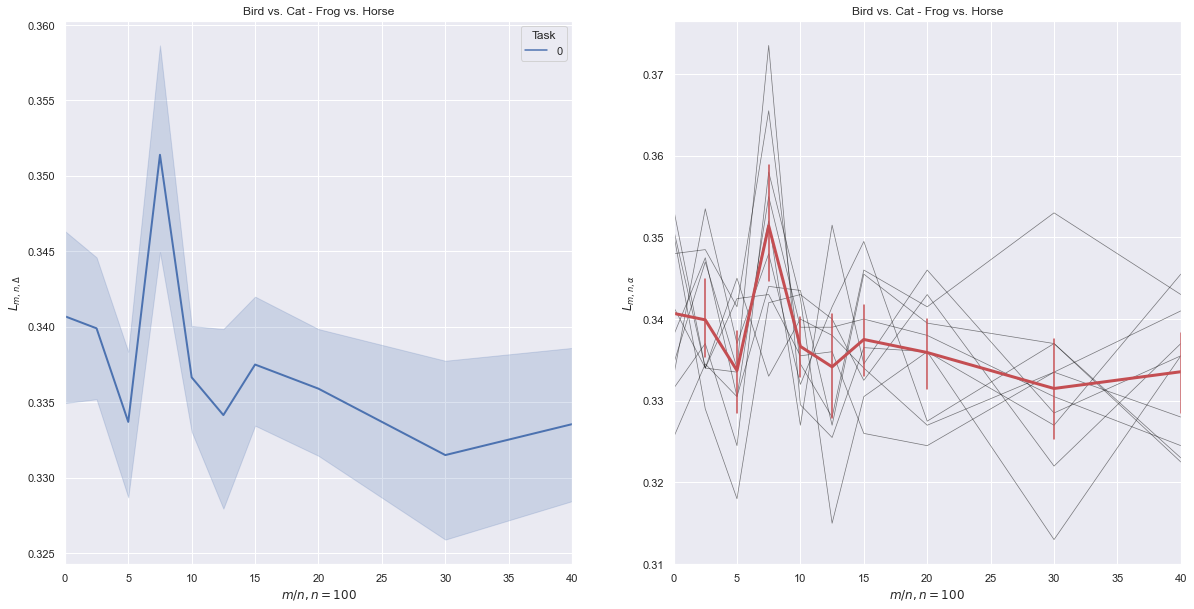

In [153]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), facecolor='white')

ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=axs[0], markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
# ax.set_ylim([0.32, 0.39])
ax.set_xlim([0, 40])
ax.set_title("Bird vs. Cat - Frog vs. Horse")

ax = sns.lineplot(data=df, x="m", y=str(0), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[1], estimator=None, lw=0.7, alpha=0.5, legend=False)
ax = sns.lineplot(data=df, x="m", y=str(0), ax=ax, markers=True, color='r', err_style="bars", lw=3)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlim([0, 40])
# ax.set_ylim([0.32, 0.39])
ax.set_ylabel(r"$L_{m, n, \alpha}$")
ax.set_xlabel(r"$m/n, n=100$")
ax.set_title("Bird vs. Cat - Frog vs. Horse")

In [147]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")